<a href="https://colab.research.google.com/github/nnanna217/msc-508-machine-learning/blob/main/Cardiovascular%20disease%20ml%20notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

Cardiovascular diseases(CVDs) are a group of conditions that affect the heart and blood vessels. These diseases include coronary artery disease, stroke, high blood pressure, heart failure, and congenital heart defects. Risk factors for cardiovascular diseases include smoking, obesity, high cholesterol, diabetes, and a sedentary lifestyle.

According to the World Health Organization, an estimated 17.9 million people die from cardiovascular diseases yearly, representing 32% of all global deaths. Of these deaths, 85% were due to strokes and heart attacks, with over three-quarters of CVD deaths occurring in low- and middle-income countries. In 2019, noncommunicable illnesses caused 17 million premature deaths in patients (under age 70), of which 38% of those fatalities were attributable to CVDs.

As one of the leading causes of death, early detection of cardiovascular disease is crucial for effective treatment with counselling and medications. One way to achieve early detection is identifying patterns in patient medical histories that can point to a risk of specific illnesses or ailments.

Using machine learning, medical records, lab test results, and other health data can be analysed using machine learning algorithms to look for patterns that might point to a higher risk of contracting CVDs. This can assist healthcare professionals in identifying people who could be more susceptible to specific illnesses or ailments and may enable them to take preventative measures to lower the dangers that may be involved.
![Intro](https://www.frontiersin.org/files/Articles/509311/fcvm-07-00001-HTML/image_m/fcvm-07-00001-g004.jpg)







## Machine Learning Pipeline

A machine learning pipeline typically consists of the following steps: data pre-processing, feature engineering, model selection, model training, model evaluation, and model deployment.

For the coursework, I adapted the following workflows in building a machine learning pipeline for building a classifier to predict Cardiovascular diseases in patients.

* Data pre-processing
* Model Selection & Training
* Model Evaluation
* Prediction/ Model Testing


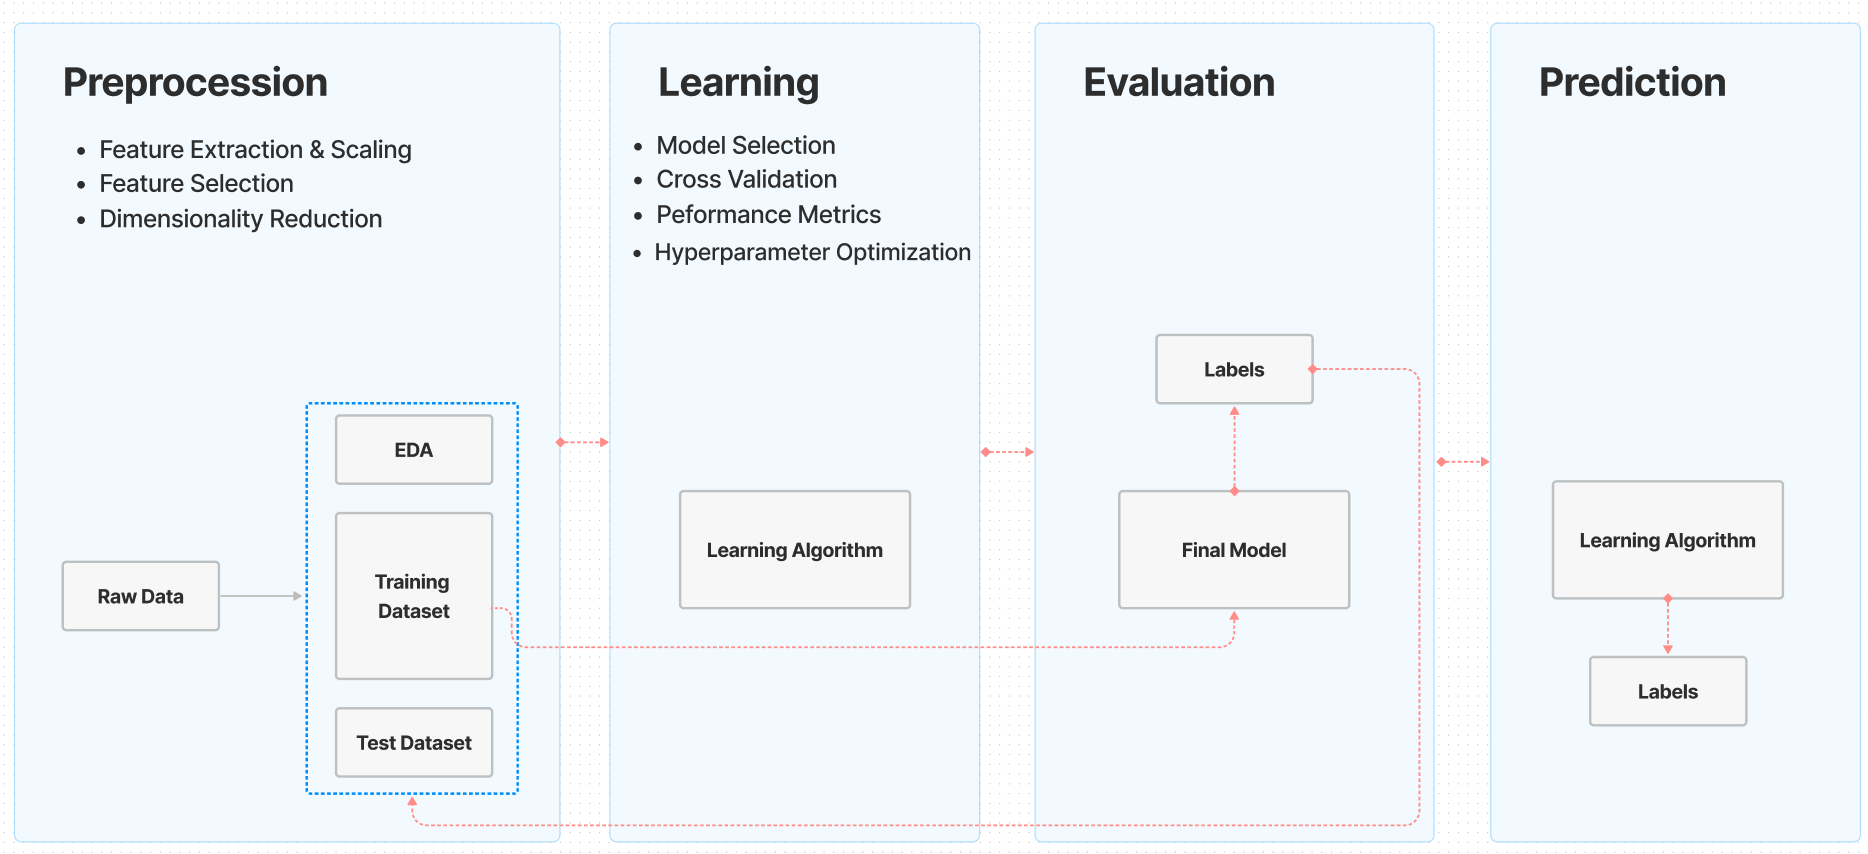

## Goals
Predicting potential Heart Diseases in people using Machine Learning algorithms. The algorithms included
1. Perceptron,
2. Logistic Regression,
3. K Neighbors Classifier,
4. Support Vector Classifier,
5. Decision Tree Classifier &
6. Random Forest Classifier.

## Tools

In [ ]:
import os
import sys
import sklearn
import numpy as np
import pandas as pd
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.cm import rainbow
# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score, precision_score, recall_score
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score, roc_curve, auc
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 2. Data pre-processing


Preparing raw data for further processing and analysis is known as **data preparation**. It entails gathering, organising, and labelling raw data into a format appropriate for machine learning (ML) algorithms, followed by data exploration and visualisation, which are crucial phases.

\

To ensure the ingested dataset is adequate for building an ML model, we will split to aforementioned data preparation steps into


> **Data preprocessing**


* Summary Statistics - Viewing dataset information

* Handling Null Values

* Eliminating duplicates

* Separating the columns in categorical and continuous

> **Exploratory Data Analysis**

* Univariate Analysis

* Bivariate Analysis

\

---




## Data preparation


#### **Reading the Dataset**


Load Heart Desease dataset from file - ( load the dataset (.csv) to the program memory)



In [ ]:
HEART_DISEASE_DPATH = os.path.join("datasets", "heart_disease")

def load_heart_disease_data(data_path=HEART_DISEASE_DPATH):
    csv_path = os.path.join(data_path, "heart_disease_dataset.csv")
    return pd.read_csv(csv_path)

heart_disease_df = load_heart_disease_data()

# Preview first 10 records
heart_disease_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
heart_disease_df.info()

# Investigate dataset for rows and attributes
values = heart_disease_df.shape
print('='*50)
print(f"The dataset contains {values[0]} records and {values[1]} attributed")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
The dataset contains 303 records and 14 attributed



### Data Dictionary
Here is a summary of some of the attributes of the heart disease dataset.  

|S/N <img width=100/>| Attribute <img width=250/> | Description <img width=250/>| Values <img width=120/> |
|: ------------|:-----------|:------------------------------------------------------||
|1| age | **The person's age in years** ||
|2| sex | **The person's sex** | *(1 = male, 0 = female)*|
|3| cp | **Chest pain** |   *( 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)* |    |     |
|4| trestbps | **Resting blood pressure** |   |   
|5| chol | **Cholesterol measurement in mg/dl**  |    |   
|6| fbs | **Fasting blood sugar**  |  *(> 120 mg/dl, 1 = true; 0 = false)*|  
|7| restecg | **Resting electrocardiographic measurement**  |  *(0 = normal, 1 = ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)*|  
|8| thalach | **Maximum heart rate achieved**  |    |
|9| exang | **Exercise induced angina**  |  *(1 = yes; 0 = no) * |
|10| oldpeak | **ST depression induced by exercise relative to rest**  |    |
|11| slope | **The slope of the peak exercise ST segment**  | *(0: upsloping, 1: flat, 2: downsloping)* |
|12| ca | **The number of major vessels**  | *(0-3)* |
|13| thal | **A blood disorder called thalassemia**  | *(1 = normal; 2 = fixed defect; 3 = reversable defect, 0 could be missing/error data)* |
|14| **target label** | **Heart disease**  | *(0 = no, 1 = yes)* |



In [ ]:
heart_disease_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Summary Statistics - Viewing dataset information using e.g. number of the rows and columns (attributes), and data types

In [ ]:
# Investigate dataset for null values
heart_disease_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Check dataset for duplicates
duplicates_row = heart_disease_df.duplicated()
heart_disease_df[duplicates_row]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


## Exploratory data analysis (EDA)



Exploratory data analysis (EDA) is a process of analyzing data sets to summarize their main characteristics, often with visual methods. It is a way of discovering patterns and relationships in data that may not be immediately obvious.

The types of Exploratory Data Analysis include:

1.   **Univariate Analysis**: This type of analysis involves looking at one variable at a time to understand its distribution and relationships with other variables.
2.   **Bivariate Analysis**: This type of analysis involves looking at two 2. Bivariate Analysis: This type of analysis involves looking at two variables at a time to understand their relationship.
3. **Multivariate Analysis**: This type of analysis involves looking at multiple variables at a time to understand their relationships.

Others include Cluster Analysis, Association Analysis & Time Series Analysis

### Univariate Analysis

**Observation**

* Next, wherever you see discrete bars, it basically means that each of these is actually a categorical variable.
* The dataset are significantly more males than females in the dataset (at an approximate ration of 2:1)
* People of chest pain category '0'(typical angina) have the highest count, whereas of count of chest pain '3'(asymtomatic) is the lowest
* Restecg count is almost the same for type 0 (normal) and 1(ST-T wave abnormality).Its almost negligible for type 2 in comparision to type 0 and 1.

In [ ]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Save figures
PROJECT_ROOT_DIR = "."
sub_dir = "proj_img"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", sub_dir)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure attribute_histogram_plots


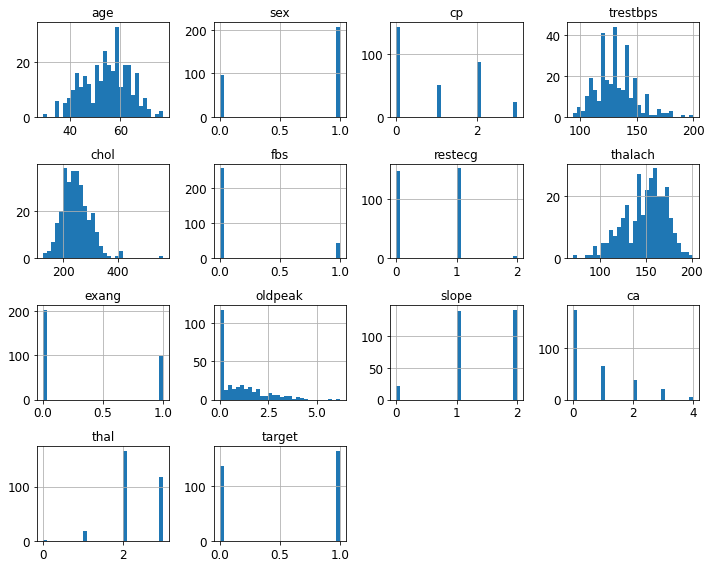

In [ ]:
heart_disease_df.hist(bins=30, figsize=(10,8))
save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
# cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']

# View correlation of the entire heart disease dataset
corr_matrix = heart_disease_df.corr().T
corr_matrix

corr_matrix["age"].sort_values(ascending=False)
corr_matrix["chol"].sort_values(ascending=False)

con_cols = ["age","trestbps","chol","thalach","oldpeak"]
target_col = ["target"]
cat_cols = []

In [ ]:
# View correlation of the continuous attributes
cont_corr_matrix = heart_disease_df[con_cols].corr().T
cont_corr_matrix

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


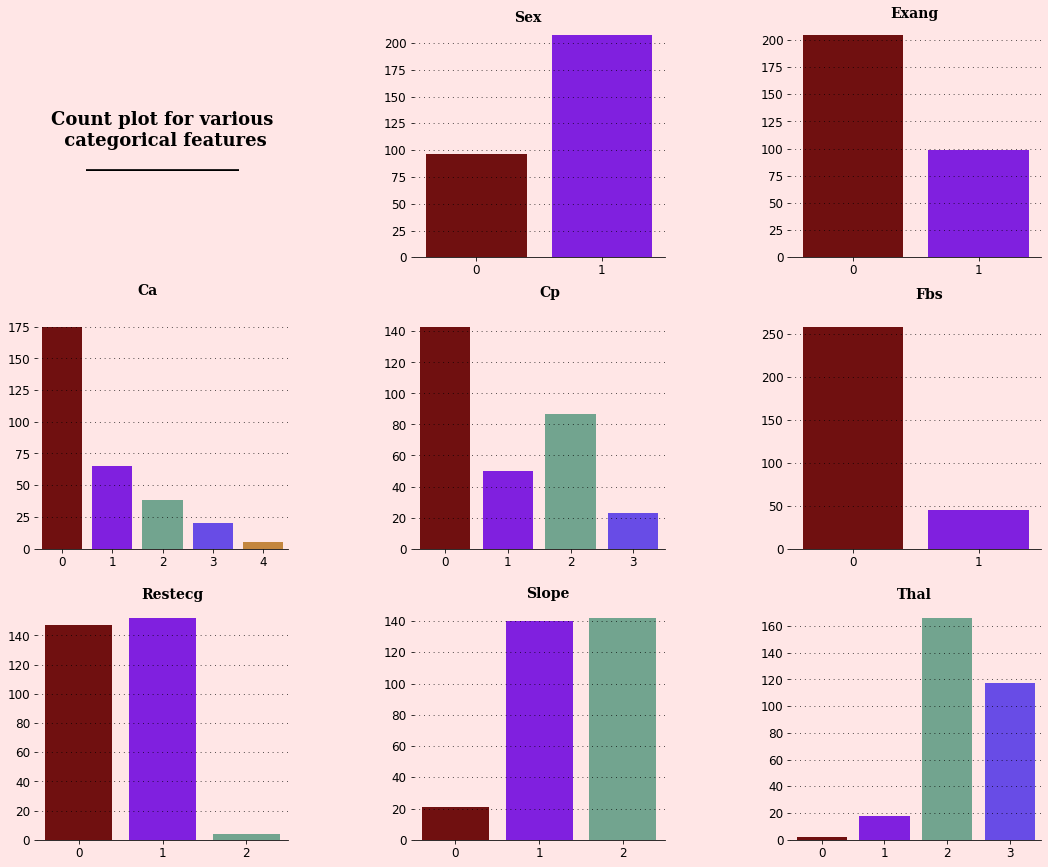

In [ ]:
#@title
# # BOX plot code as from source[X]

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=heart_disease_df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exang', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=heart_disease_df,x='exang',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Ca count
ax3.text(1.5, 200, 'Ca', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=heart_disease_df,x='ca',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=heart_disease_df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=heart_disease_df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=heart_disease_df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slope', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=heart_disease_df,x='slope',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thal', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=heart_disease_df,x='thal',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

### end of source[1]
# source[1]- https://www.kaggle.com/code/namanmanchanda/heart-attack-eda-prediction-90-accuracy

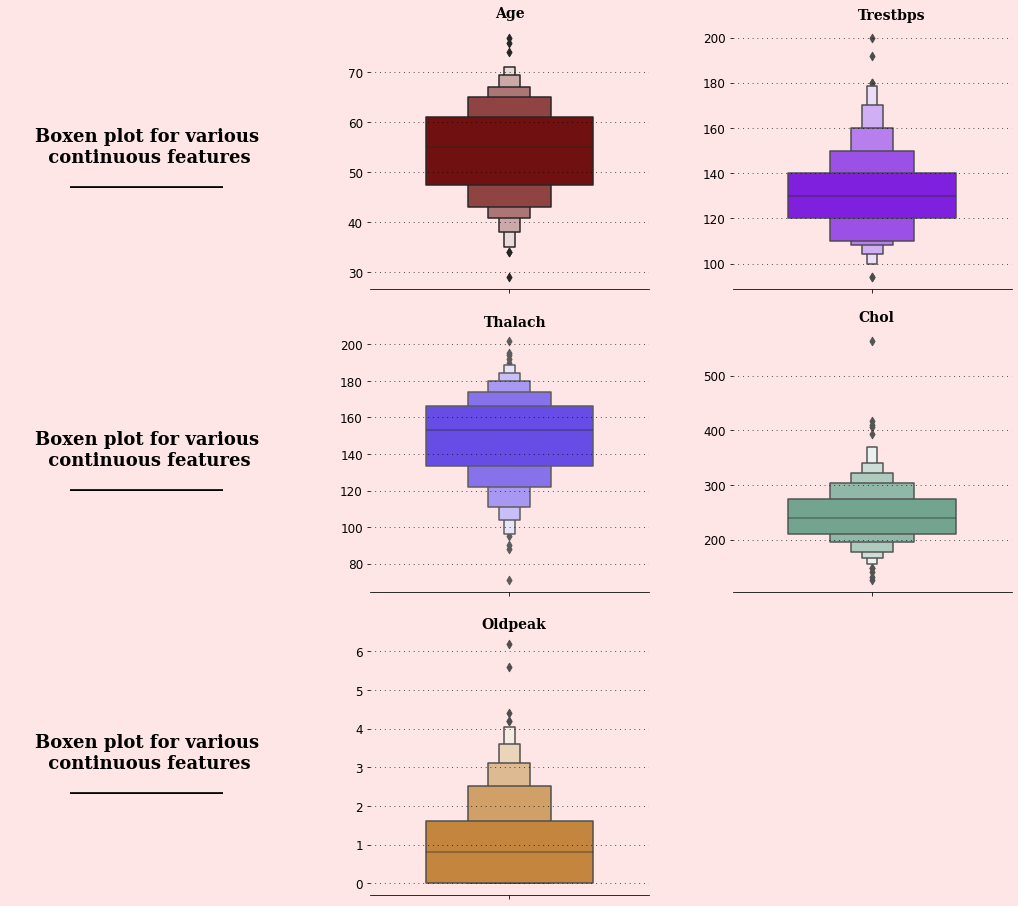

In [ ]:
#@title
# BOX plot code as from source[X]
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
# ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
# ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=heart_disease_df['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps
ax2.text(-0.05, 208, 'Trestbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=heart_disease_df['trestbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Explanation
ax3.spines["bottom"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.tick_params(left=False, bottom=False)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")


# Thalachh
ax4.text(-0.09, 210, 'Thalach', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=heart_disease_df['thalach'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Chol
ax5.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=heart_disease_df['chol'],palette=["#6aac90"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")


# Explanation
ax6.spines["bottom"].set_visible(False)
ax6.spines["left"].set_visible(False)
ax6.spines["top"].set_visible(False)
ax6.spines["right"].set_visible(False)
ax6.tick_params(left=False, bottom=False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# oldpeak
ax7.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax7,y=heart_disease_df['oldpeak'],palette=["#da8829"],width=0.6)
ax7.set_xlabel("")
ax7.set_ylabel("")


for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    # ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    # ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)

### end of source[1]
# source[1]- https://www.kaggle.com/code/namanmanchanda/heart-attack-eda-prediction-90-accuracy

### Bivariate Analysis

Here are some descriptive statistics used show some intuitive relationships betweeen variables

*   Swarm plot
*   Correlation Matrix
*   Pairplot
*   Countplot
*   Kernel Density
*   Box Plot -

**Oberservation**

* People belonging to caa category '0' , irrespective of their age are highly prone to getting a heart attack.
* While there are very few people belonging to caa category '4' , but it seems that around 75% of those get heart attacks.
* People belonging to category '1' , '2' and '3' are more or less at similar risk.
* Groups with Non-anginal (Type 2) Chest pain are more at risk of a heart disease
* Groups with blocked vessels (0 vessels) are most at risk of a heart disease
* There are more male heart disease conditions than females, although the skewness of the data may actually have accounted for this.




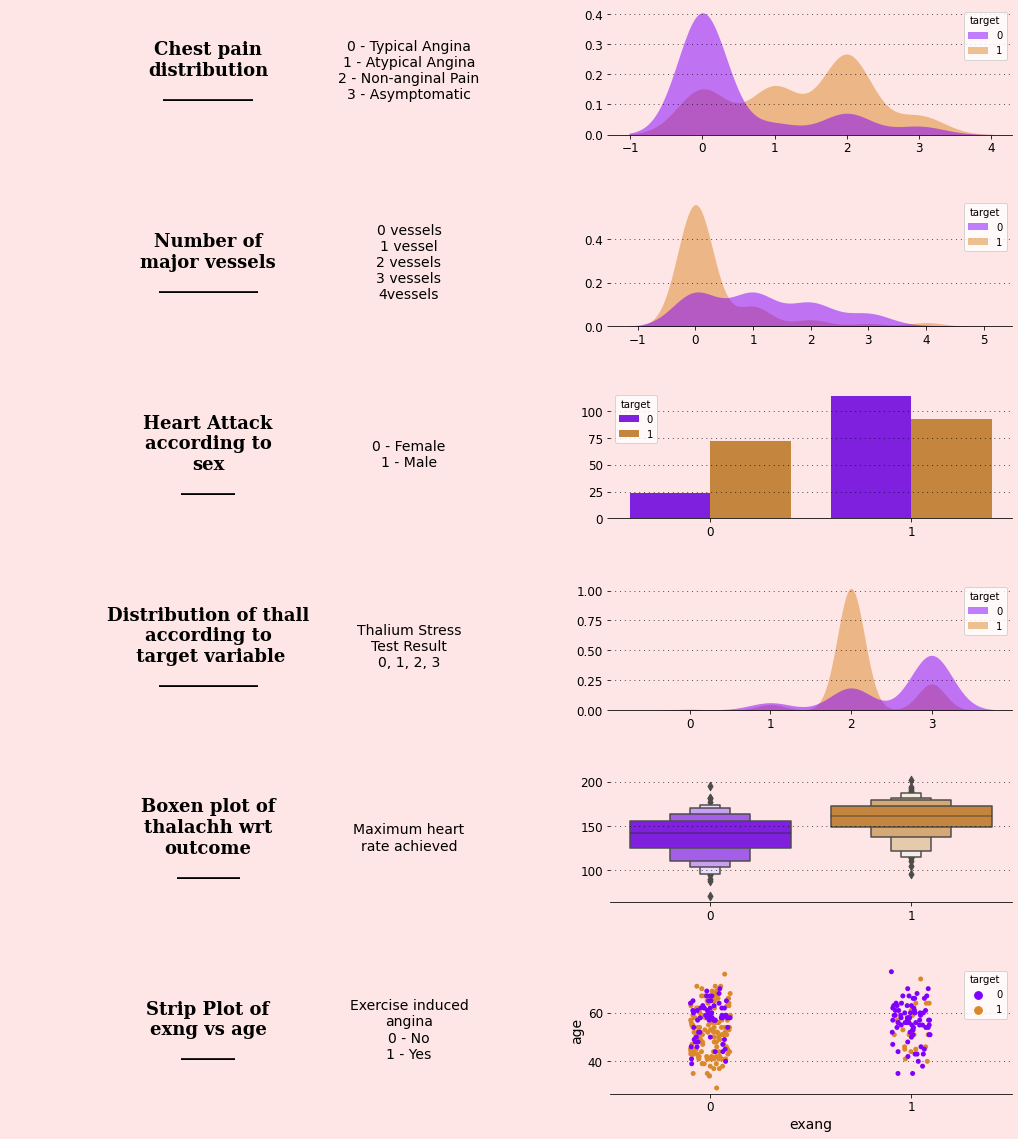

In [ ]:
#@title
# Bivariate analysis plot as from source [1]

fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=heart_disease_df, x='cp',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Number of\nmajor vessels\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=heart_disease_df, x='ca',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=heart_disease_df,x='sex',palette=["#8000ff","#da8829"], hue='target')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribution of thall\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=heart_disease_df, x='thal',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalachh title
ax8.text(0.5,0.5,"Boxen plot of\nthalachh wrt\noutcome\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=heart_disease_df,x='target',y='thalach',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")



# Exng title
ax10.text(0.5,0.5,"Strip Plot of\nexng vs age\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# Exng
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=heart_disease_df,x='exang',y='age',hue='target',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

### end of source[3]
# source[1]- https://www.kaggle.com/code/namanmanchanda/heart-attack-eda-prediction-90-accuracy

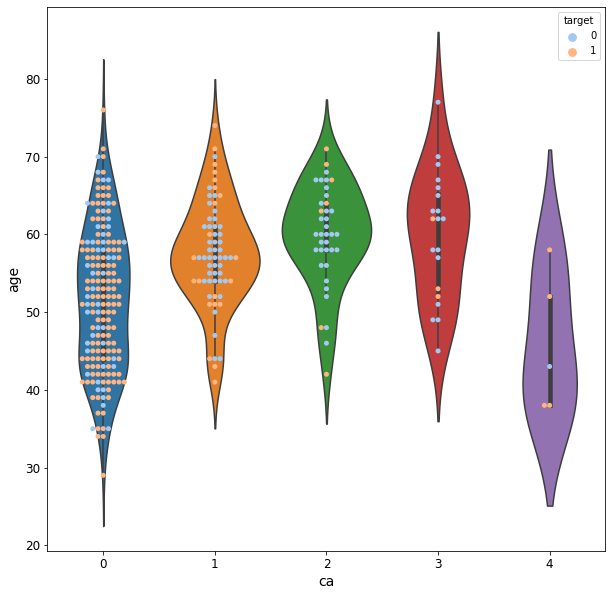

In [ ]:
plt.figure(figsize = (10,10))
sns.violinplot(x='ca',y='age',data=heart_disease_df)
sns.swarmplot(x=heart_disease_df['ca'],y=heart_disease_df['age'],hue=heart_disease_df['target'], palette='pastel')

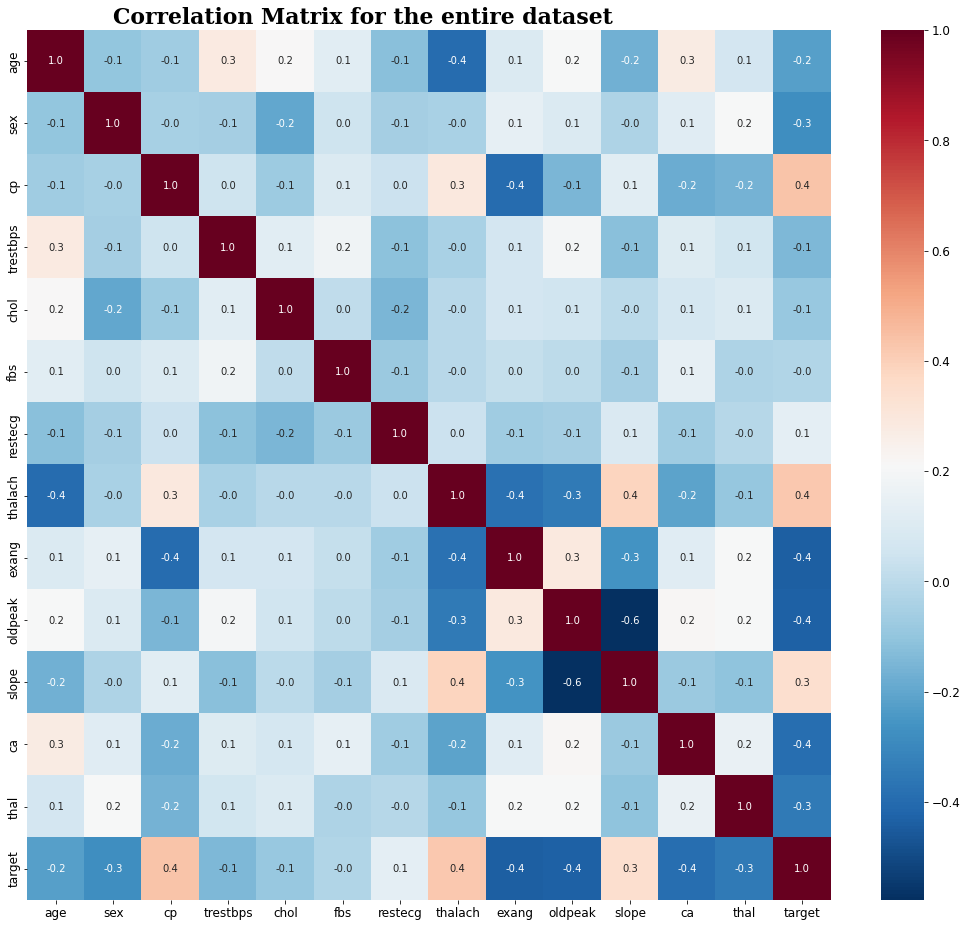

In [ ]:
# Heatmap representing correlation of the entire dataset matrix
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0, 0])


mask = np.triu(np.ones_like(corr_matrix))
mask2 = np.triu(np.ones_like(cont_corr_matrix))
color_palette = ["#5833ff","#da8829"]
ax0.text(1.5,-0.1,"Correlation Matrix for the entire dataset",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")

# ax0.text(1.5,-0.1,"Correlation Matrix for Continuous data",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(corr_matrix , cmap='RdBu_r', fmt=".1f",annot=True)
plt.show()
# sns.heatmap(cont_corr_matrix,mask=mask2,fmt=".1f",annot=True,cmap='YlGnBu')
# plt.show()


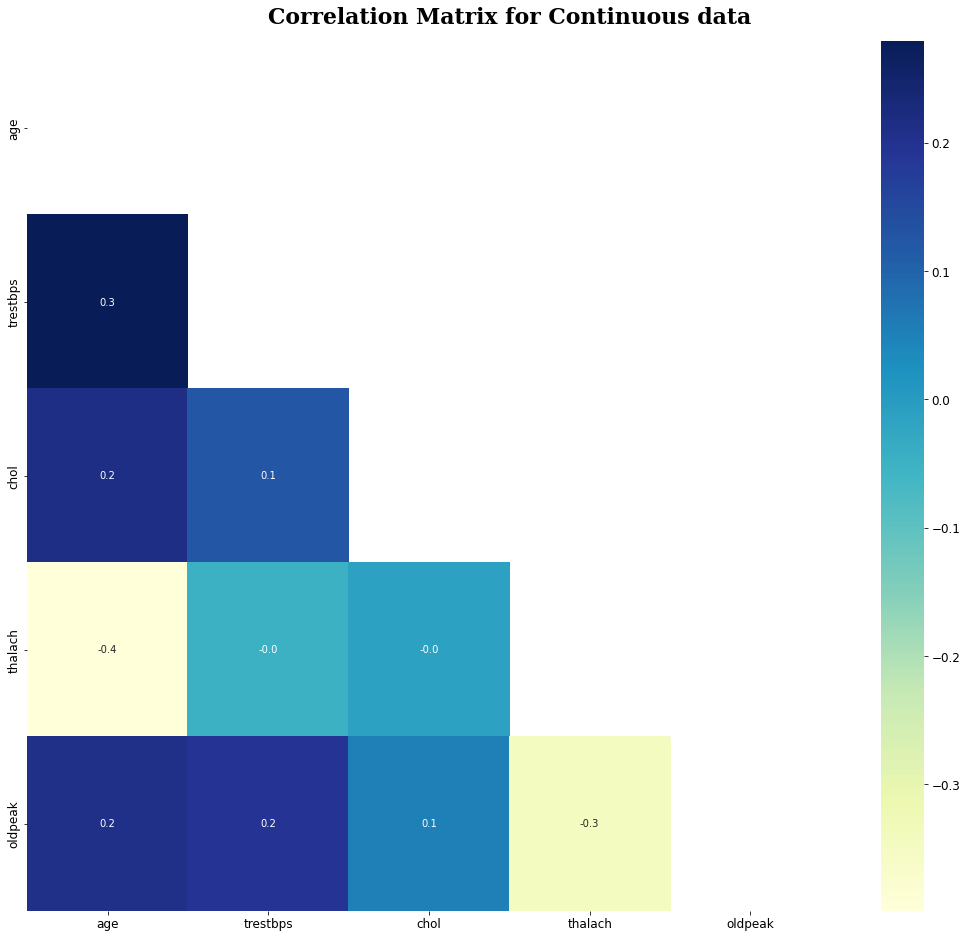

In [ ]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0, 0])

mask = np.triu(np.ones_like(cont_corr_matrix))
color_palette = ["#5833ff","#da8829"]
ax0.text(1.5,-0.1,"Correlation Matrix for Continuous data",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")

sns.heatmap(cont_corr_matrix,mask=mask2,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

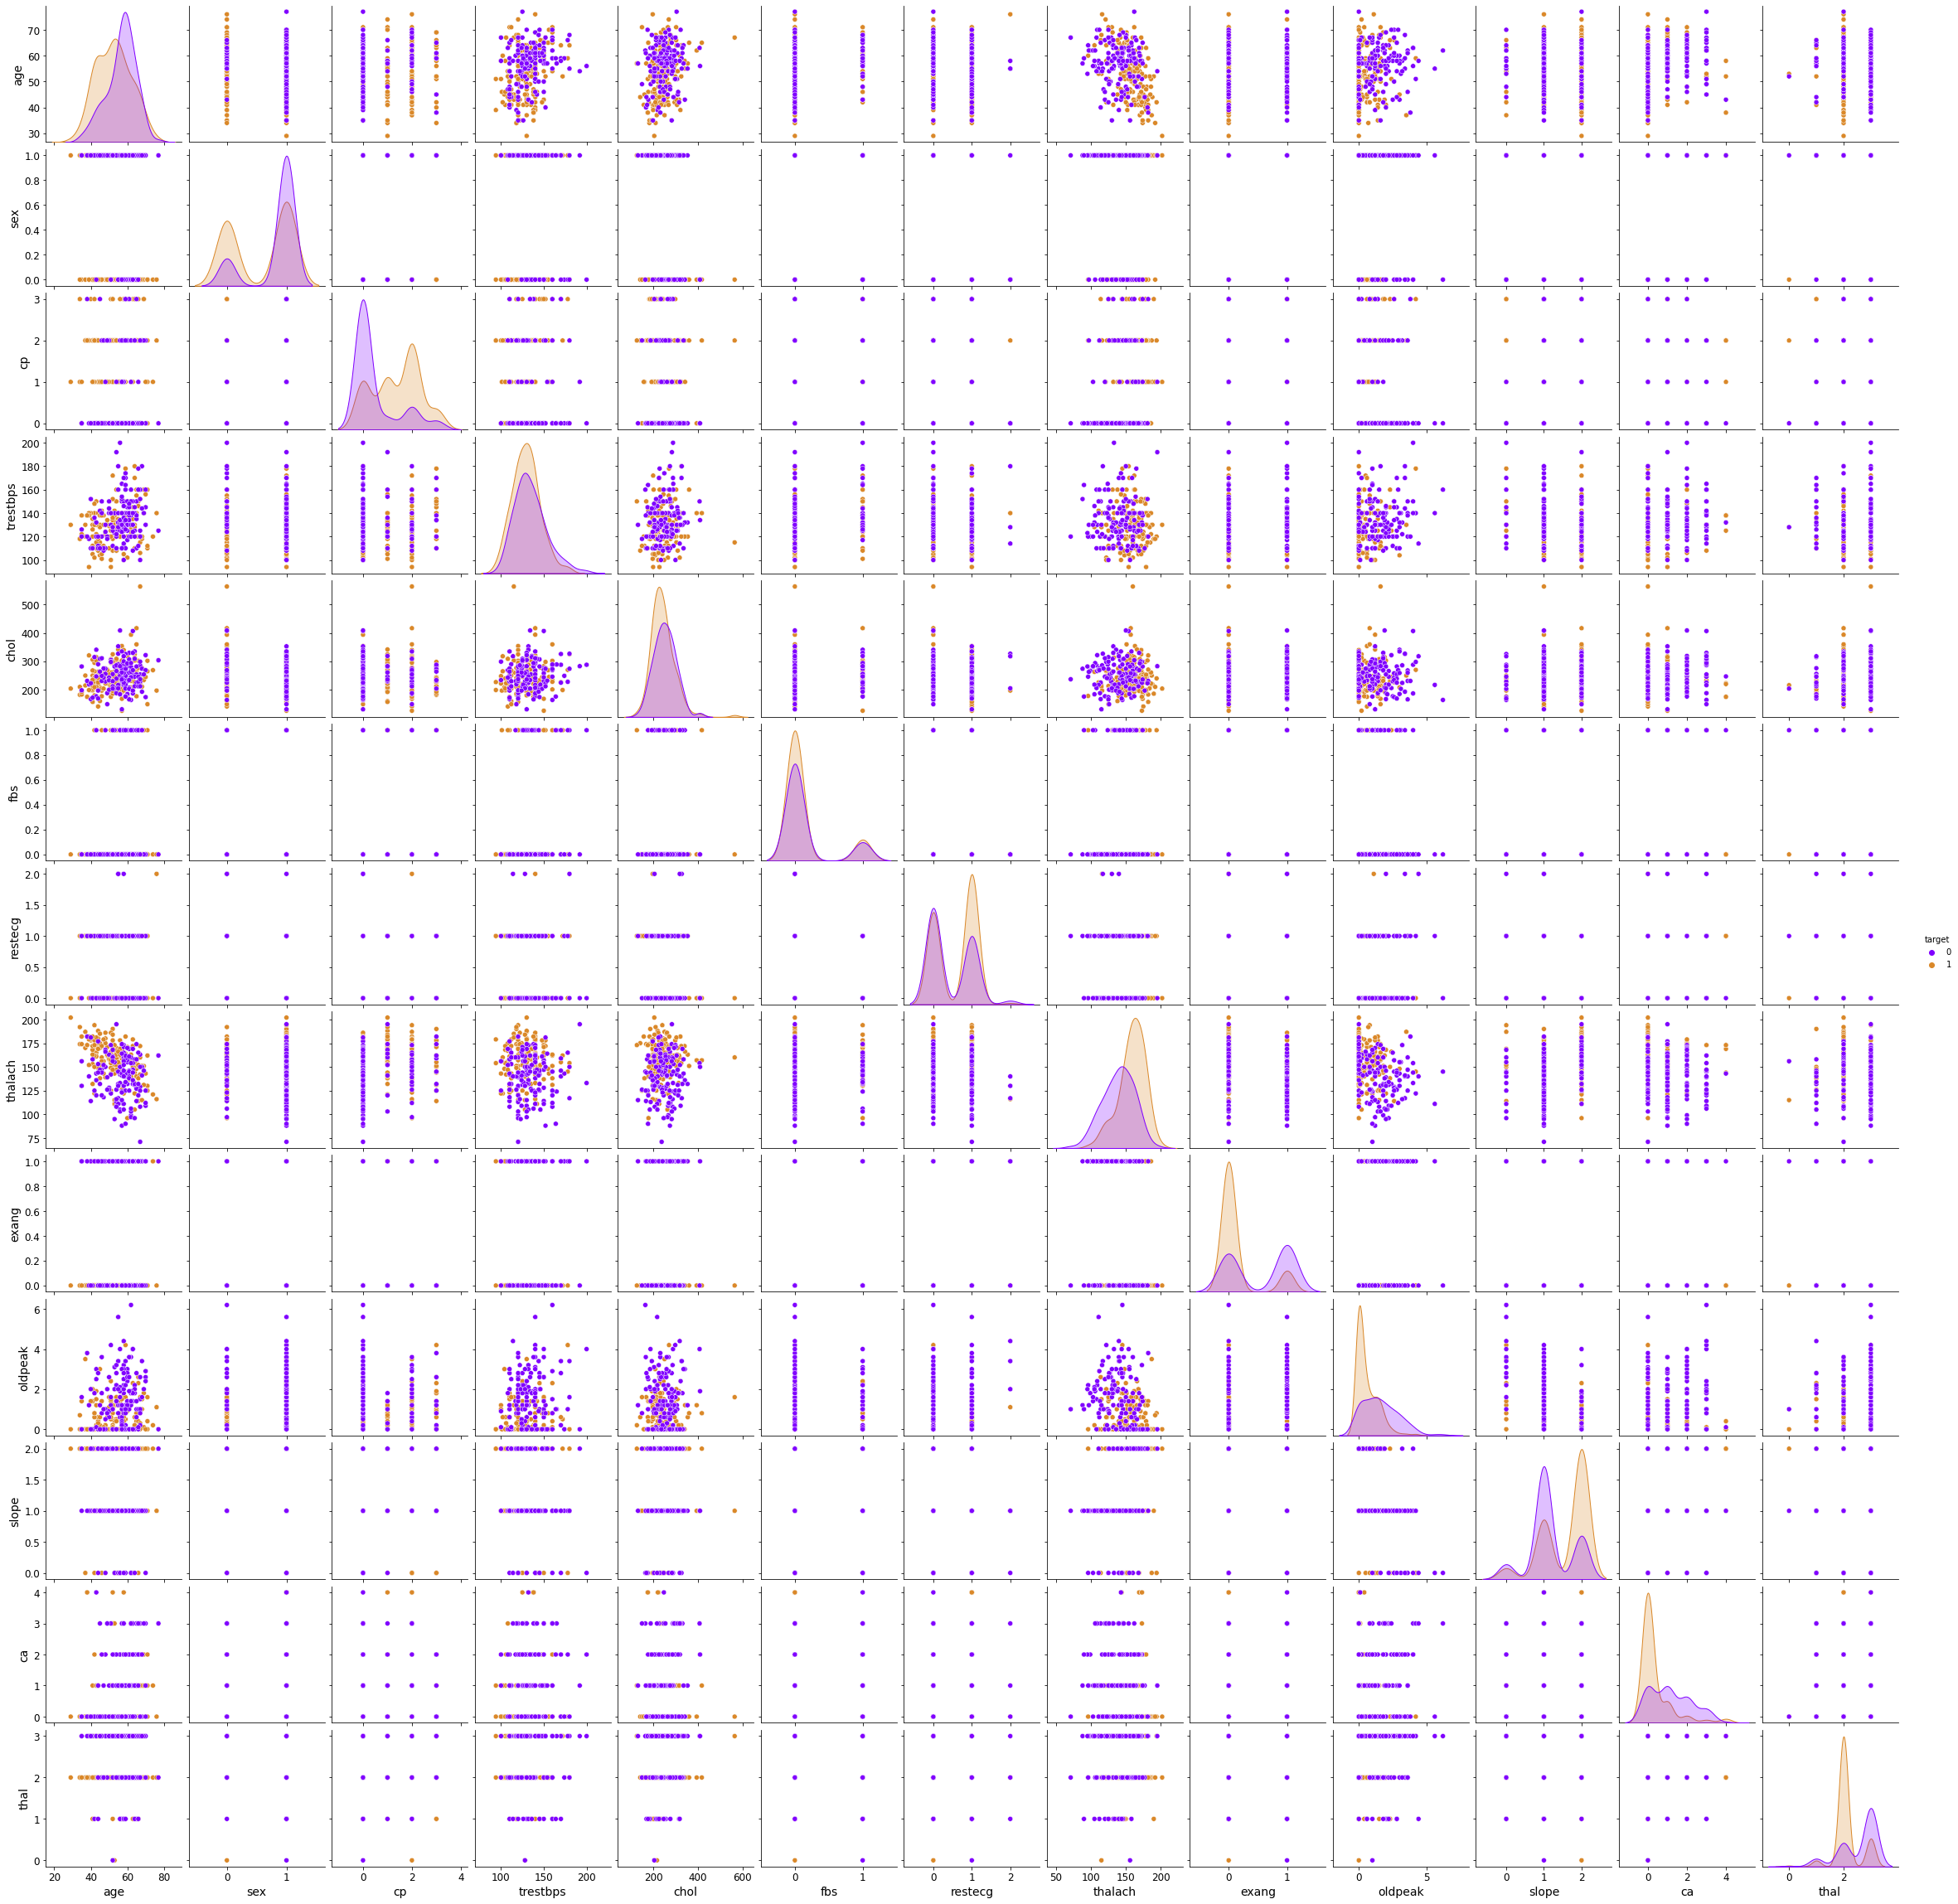

In [ ]:
sns.pairplot(heart_disease_df,hue='target',palette = ["#8000ff","#da8829"])
plt.show()

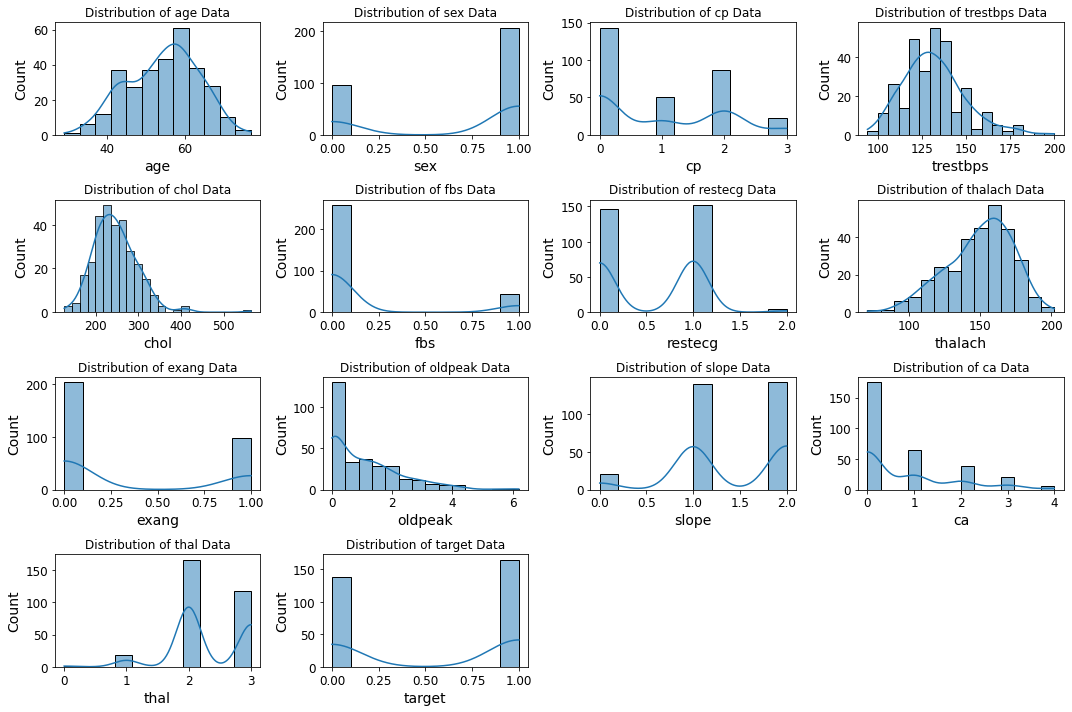

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(heart_disease_df,1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heart_disease_df[col],kde=True)
    plt.tight_layout()
    plt.plot()

## Feature Selection

Feature selection is the process of selecting the most relevant features from a dataset to use in a machine-learning model. It is used to reduce the complexity of the model and improve its accuracy. Feature selection can be done manually or automatically using algorithms such as recursive feature elimination or principal component analysis.

**Manual approach to Feature Selection**

---



---



In [ ]:
dataset = pd.get_dummies(heart_disease_df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
# standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])


In [ ]:
data = {}
for i in list(heart_disease_df.columns):
    values = []
    values.append(heart_disease_df[i].value_counts().shape[0])
    if(i in con_cols):
      values.append("continuous")
    elif i in target_col:
      values.append("label")
    else:
      cat_cols.append(i)
      values.append("categorical")

    data[i] = values

print("-"*100)
print(f"Categorical attributes:- {cat_cols}")
print(f"Continuous attributes:- {con_cols}")
print(f"Target attributes:- {target_col}")
print("-"*100)
pd.DataFrame(data,index=["unique_count","data_type"]).T

----------------------------------------------------------------------------------------------------
Categorical attributes:- ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Continuous attributes:- ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Target attributes:- ['target']
----------------------------------------------------------------------------------------------------


,unique_count,data_type
age,41,continuous
sex,2,categorical
cp,4,categorical
trestbps,49,continuous
chol,152,continuous
fbs,2,categorical
restecg,3,categorical
thalach,91,continuous
exang,2,categorical
oldpeak,40,continuous


# Training the Model

**Split the Dataset**

* I split the dataset into 80% training data and 20% testing data.

**Model Selection**

I trained my model using the following approaches
* Perceptron
* Logistic Regression Model
* K-Nearest Neighbours
* Support Vector Model
* Decision Tree
* Random Forest


In [ ]:
# Splitting data into 80% training & 20% test data with same proportion[X]

models = {}

# First divide data into test & training set
X = heart_disease_df.iloc[:, :-1].values
y = heart_disease_df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

print('Shape for X & Y values', X.shape, y.shape)
print('Shape for training data', X_train.shape, y_train.shape)
print('Shape for testing data', X_test.shape, y_test.shape)
print('-'*50)
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))
print('-'*50)
print('y_train:',y_train)
print('y_test:',y_test)

Shape for X & Y values (303, 13) (303,)
Shape for training data (242, 13) (242,)
Shape for testing data (61, 13) (61,)
--------------------------------------------------
Labels count in y: [138 165]
Labels count in y_train: [110 132]
Labels count in y_test: [28 33]
--------------------------------------------------
y_train: [0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1
 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0
 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0
 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1]
y_test: [0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1]


### Standize the features

**Normalization** -
Also known as Min-Max scaling, is a Scaling technique were values are shifted and rescaled so that they end up ranging between 0 and 1.
![Normalization](https://i.stack.imgur.com/EuitP.png)

In [ ]:
# Normalization - Scale features using MinMax Scaler
r_scaler = MinMaxScaler()
X_train_minmax_std = r_scaler.fit_transform(X_train)
X_test_minmax_std = r_scaler.transform(X_test)

print(X_train_minmax_std [:,0].mean())
print(X_test_minmax_std [:,0].std())
print('-'*50)

0.5334022038567493
0.1777584373531266
--------------------------------------------------


**Standardization**

A scaling technique where the values are centered around the mean with a unit standard deviation.

![Standardization](https://clavelresearch.files.wordpress.com/2019/03/z-score-population.png)

In [ ]:
# Scale features using sta...
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std[:,0].mean())
print(X_train_std[:,0].std())
print('-'*50)

2.385603193409427e-16
1.0
--------------------------------------------------


**Robust Scaler**

It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range.

In [ ]:
# Scale features using Robust Scaler
r_scaler = RobustScaler()
X_train_robust_std = r_scaler.fit_transform(X_train)
X_test_robust_std = r_scaler.transform(X_test)

print(X_train_robust_std [:,0].mean())
print(X_test_robust_std [:,0].std())
print('-'*50)

-0.10743801652892561
0.6563388456115444
--------------------------------------------------


**Observation**

All 3 approaches were employed and trained with, and there was little to no difference in the accuracy score. Using Logistic Regression, all 3 maintained an accuracy score of  82%, and had similar Misclassification of 11 labels

### Linear Regression

Hypothesis: Given the data is not linearly seperable, this may not be the best model to use. RobustScaler uses the interquartile range so that it is robust to outliers

In [ ]:
models['linear_regression'] = 0

### Perceptron

![Perceptron](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwj4Zsjwd3IghuRKGF1LTiKL-UtqFBH9gMRX_jpZqrcQ&s)

In [ ]:
ppn = Perceptron(eta0=0.3, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
models['perceptron'] = accuracy_score(y_test, y_pred)*100

Misclassified examples: 16
Accuracy: 0.738
Precision: 0.743
Recall: 0.788


## Logistic Regression

![Logistic Regression](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)

In [ ]:
# Iteration 1 - Retraining the model using Standard Scaler
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_std,y_train)
y_pred=lr.predict(X_test_std )

print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
models['log_regression'] = accuracy_score(y_test, y_pred)*100
# pass

Misclassified examples: 11
Accuracy: 0.820
Precision: 0.824
Recall: 0.848


In [ ]:
# Iteration 2 - Retraining the model using Minmax standardization
lr.fit(X_train_minmax_std,y_train)
y_pred=lr.predict(X_test_minmax_std )

print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
# pass

Misclassified examples: 11
Accuracy: 0.820
Precision: 0.806
Recall: 0.879


In [ ]:
# Iteration 2 - Retraining the model using Robust standardization
lr.fit(X_train_robust_std,y_train)
y_pred=lr.predict(X_test_robust_std )
# print(classification_report(y_test,y_pred))
# acc=roc_auc_score(y_test,y_pred)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Misclassified examples: 11
Accuracy: 0.820
Precision: 0.806
Recall: 0.879


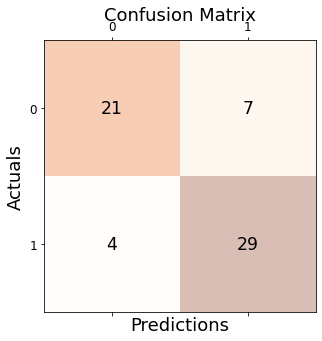

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1 , X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0],
                  y=X[y == cl, 1],
                  alpha=0.6, color=cmap(idx), edgecolor='black',
                  marker=markers[idx], label=cl)

# Source - Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning : Machine Learning and Deep Learning with Python, Scikit-Learn, and TensorFlow 2,
#3rd Edition, Packt Publishing, Limited, 2019. ProQuest Ebook Central, http://ebookcentral.proquest.com/lib/lboro/detail.action?docID=6005547.


### Feature Selection via Dimensionality Reduction (PCA)
**Principal Component Analysis**

---

PCA (Principal Component Analysis) is a dimension reduction technique. It is used to reduce the number of features in a dataset by transforming the data into a lower-dimensional space while preserving the most important information. This helps to reduce the complexity of the model and improve

![PCA](https://dezyre.gumlet.io/files.dezyre.com/images/Tutorials/Principal+Component+Analysis.jpg?w=600&dpr=2.6)


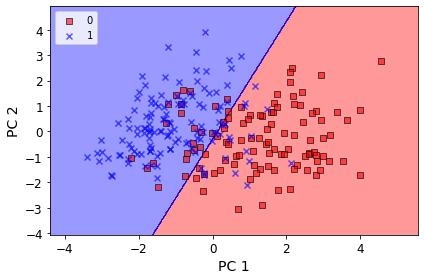

Misclassified examples: 14
Accuracy: 0.770


In [ ]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

y_pred=lr.predict(X_test_pca)

# print(classification_report(y_test,y_pred))
acc=roc_auc_score(y_test,y_pred)
# print(f"The accuracy is: {acc}")
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
models['pca_log_regression'] = acc*100

In [ ]:
clf = [
    LogisticRegression(),
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:

    predicted = alg.fit(X_train_robust_std, y_train).predict(X_test_robust_std)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_robust_std, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_robust_std, y_test), 5)
    clf_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1

clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)
clf_compare

,Train Accuracy,Test Accuracy,Precision,Recall,AUC
0,0.8595,0.81967,0.80556,0.87879,0.81439


### Applying Cross Validation to the Logistic Regression

In [ ]:
acc_log=[]
kf=StratifiedKFold(n_splits=5)
for fold , (train_index,test_index) in enumerate(kf.split(X,y)):

    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    #Min max Scalar
    mm_scaler=MinMaxScaler()
    X_train_fold=mm_scaler.fit_transform(X_train_fold)
    X_test_fold = mm_scaler.transform(X_test_fold)

    clf=LogisticRegression()
    clf.fit(X_train_fold,y_train_fold)
    y_pred=clf.predict(X_test_fold)

    print(f"| The fold is : {fold} | ")
    print('+'+'-'*55+ '+')
    print('| Accuracy: ' +'\033[1m {:.2f}%'.format(accuracy_score(y_test_fold, y_pred)*100))
    print('| Precision: ' +'\033[1m {:.2f}%'.format(precision_score(y_test_fold, y_pred)*100))
    print('| Recall: ' +'\033[1m {:.2f}%'.format(recall_score(y_test_fold, y_pred)*100))
    print('| Misclassifications: %d' % (y_test_fold != y_pred).sum())
    print('+'+'-'*55+ '+')

    # print(classification_report(y_test_fold,y_pred))
    acc=roc_auc_score(y_test_fold,y_pred)
    acc_log.append(acc)

    pass
    print('+'+'-'*55+ '+')

| The fold is : 0 | 
+-------------------------------------------------------+
| Accuracy:  83.61%
| Precision:  79.49%
| Recall:  93.94%
| Misclassifications: 10
+-------------------------------------------------------+
+-------------------------------------------------------+
| The fold is : 1 | 
+-------------------------------------------------------+
| Accuracy:  85.25%
| Precision:  85.29%
| Recall:  87.88%
| Misclassifications: 9
+-------------------------------------------------------+
+-------------------------------------------------------+
| The fold is : 2 | 
+-------------------------------------------------------+
| Accuracy:  81.97%
| Precision:  84.38%
| Recall:  81.82%
| Misclassifications: 11
+-------------------------------------------------------+
+-------------------------------------------------------+
| The fold is : 3 | 
+-------------------------------------------------------+
| Accuracy:  86.67%
| Precision:  83.78%
| Recall:  93.94%
| Misclassifications: 8
+-

### Evaluting the model with unseen data

In [ ]:
# Testing the model with data not seen before
clf.predict_proba(X_test_fold[:3, :])
clf.predict(X_test_fold[:10, :])
# print(y_test_fold[:10, :-1])

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [ ]:
## Hyper-parameter tunning for Logistic Regression

clf = [
    LogisticRegression(solver='newton-cg',penalty='l2', C=0.3, max_iter=10000, random_state=1),
    LogisticRegression(solver='lbfgs',penalty='l2',C=0.3, max_iter=10000, random_state=1),
    LogisticRegression(solver='sag',penalty='l2', C=0.3, max_iter=10000, random_state=1),
    LogisticRegression(solver='saga',penalty='l2',C=0.3, max_iter=10000, random_state=1),
    LogisticRegression(solver='liblinear',penalty='l1', C=10, max_iter=10000, random_state=1, multi_class='ovr')
        ]
clf_columns = []

weights, params = [], []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:

    predicted = alg.fit(X_train_robust_std, y_train).predict(X_test_robust_std)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_robust_std, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_robust_std, y_test), 5)
    clf_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)
    weights.append(alg.coef_)

    row_index+=1

models['optimized_log_regression'] = clf_compare["Test Accuracy"][0]*100
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)
clf_compare

# print(clf_compare["Test Accuracy"][0])

# https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69

,Train Accuracy,Test Accuracy,Precision,Recall,AUC
0,0.86364,0.81967,0.80556,0.87879,0.81439
1,0.86364,0.81967,0.80556,0.87879,0.81439
2,0.86364,0.81967,0.80556,0.87879,0.81439
3,0.86364,0.81967,0.80556,0.87879,0.81439
4,0.86364,0.81967,0.82353,0.84848,0.81710


## K-Nearest Neighbour (KNN)

![KNN](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png)

In [ ]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=14)
KNNClassifier.fit(X_train, y_train)


y_pred_KNN = KNNClassifier.predict(X_test)
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')
print('Misclassified examples: %d' % (y_test != y_pred_KNN).sum())
print('Accuracy: %.3f' % KNNAcc)
models['knn_unscaled'] = KNNAcc*100

.:. K-Nearest Neighbour Accuracy: 63.93% .:.
Misclassified examples: 22
Accuracy: 0.639


In [ ]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=14)
KNNClassifier.fit(X_train_robust_std, y_train)


y_pred_KNN = KNNClassifier.predict(X_test_robust_std)
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')
print('Misclassified examples: %d' % (y_test != y_pred_KNN).sum())
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % KNNAcc)


.:. K-Nearest Neighbour Accuracy: 83.61% .:.
Misclassified examples: 10
Accuracy: 0.836


### Hyper parameter tuning for the KNN model


Goal: To select the best value of k for KNN model to predict if a patient may have a heart condition



In [ ]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
k_range = list(range(1, 15))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNNClassifier, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_robust_std, y_train)
grid.best_params_


{'n_neighbors': 13}

Text(0, 0.5, 'Error Rate')

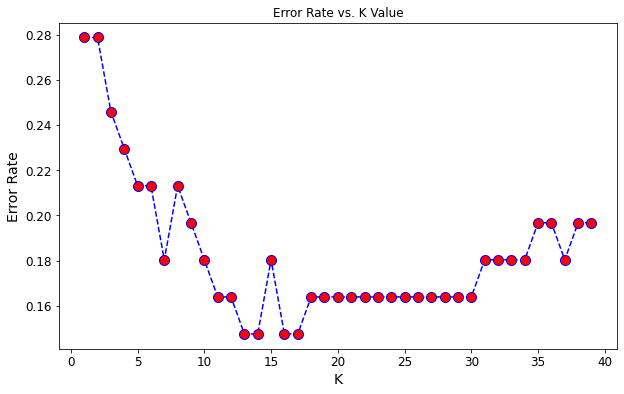

In [ ]:
# Optimizing KNN from source[x]

error_rate = []

for i in range(1, 40):

    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train_std, y_train)
    pred_i = model.predict(X_test_std)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# end of source [x]

# source[x] - https://www.kaggle.com/code/shrikrishnaparab/heart-attack-analysis-prediction-accuracy-85-24?scriptVersionId=114822843

In [ ]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=13)
KNNClassifier.fit(X_train_std, y_train)


y_pred_KNN = KNNClassifier.predict(X_test_std)
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')
print('Misclassified examples: %d' % (y_test != y_pred_KNN).sum())
models['knn_scaled'] = KNNAcc*100
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

.:. K-Nearest Neighbour Accuracy: 85.25% .:.
Misclassified examples: 9


In [ ]:
scores = cross_val_score(KNNClassifier, X_train_robust_std, y_train, cv=5, scoring='accuracy')
# print(scores)
average_score = scores.mean()
print(scores)
print(average_score)

[0.85714286 0.81632653 0.8125     0.85416667 0.8125    ]
0.8305272108843538


The accuracy of KNN is :  85.24590163934425 %


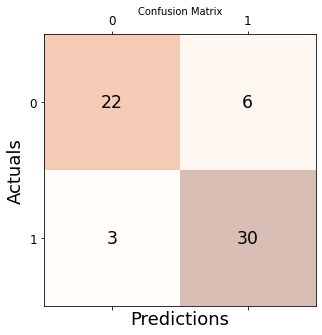

In [ ]:
# Optimizing KNN with N neighbeours with scaling from source[x]
# k = 14
knn_o_model = KNeighborsClassifier(n_neighbors = 14)

knn_o_model.fit(X_train_std, y_train)
predicted = knn_o_model.predict(X_test_std)

print("The accuracy of KNN is : ", accuracy_score(y_test, predicted)*100, "%")
models['Optimized_knn'] = accuracy_score(y_test, predicted)*100
# end of source [x]

# source[x] - https://www.kaggle.com/code/shrikrishnaparab/heart-attack-analysis-prediction-accuracy-85-24?scriptVersionId=114822843

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predicted)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

### Evaluating the model with data unseen



In [ ]:
# Testing the model with data not seen before
knn_o_model.predict(X_test_fold[:10, :])


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

## Support Vector Machine

![Support Vector Machine](https://editor.analyticsvidhya.com/uploads/72598SVM%20(1).png)

1. Prepare the dataset (e.g. scaling)
2. Select the kernel function (e.g. ploy, RBF)
3. Select the hypermeter of the kernel function (e.g. polynormal order, RBF γ, and regularization C)
– Try default values, or set apart a validation set to
determine the hypermeters, or grid search
4. Train the model
5. Test the model using unseen data. can be classified
using the model trained with the support vectors

In [ ]:
# --- Applying SVM ---
svcClassifier = [SVC(kernel='linear', C=200, probability=True)]
svcClassifier_columns = []
error_rate = []
svcClassifier_compare = pd.DataFrame(columns = svcClassifier_columns)

row_index = 0
for alg in svcClassifier:

    predicted = alg.fit(X_train_robust_std, y_train).predict(X_test_robust_std)
    fp, tp, th = roc_curve(y_test, predicted)
    svcClassifier_name = alg.__class__.__name__
    svcClassifier_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_robust_std, y_train), 5)
    svcClassifier_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_robust_std, y_test), 5)
    svcClassifier_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted),5)
    svcClassifier_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    svcClassifier_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)
    error_rate.append(np.mean(pred_i != y_test))

    row_index+=1

print(error_rate)
svcClassifier_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)
svcClassifier_compare

[0.19672131147540983]


,Train Accuracy,Test Accuracy,Precision,Recall,AUC
0,0.8595,0.81967,0.82353,0.84848,0.8171


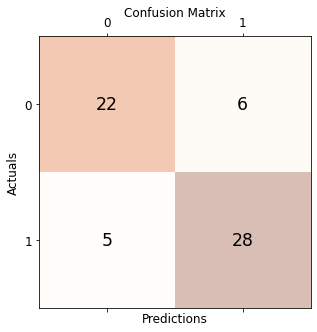

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predicted)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

### Hyperparameter tuning for SVM

In [ ]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.3, 0.9, 0.1, 1, 10, 20, 30],
    'degree': [2,3,4],
    'gamma': [0.001, 0.01, 0.1, 0.3, 1, 2, 10]
}
clf_grid_SVC = GridSearchCV(estimator = SVC(random_state=42), param_grid=param_grid, cv=5)
clf_grid_SVC.fit(X_train_robust_std, y_train)
print(clf_grid_SVC.best_params_)
print(clf_grid_SVC.best_score_)



{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
0.8473639455782314


In [ ]:
error_rate = []
svcClassifier = [
    SVC(kernel='linear', C=10, random_state=1, gamma=0.01, degree=2),
    SVC(kernel='poly', C=10, random_state=1, gamma=0.01, degree=2),
    SVC(kernel='rbf', C=10, random_state=1, gamma=0.01, degree=2),
    SVC(kernel='sigmoid', C=10, random_state=1, gamma=0.01, degree=2)
    ]
svcClassifier_columns = []
svc_scores = []
svcClassifier_compare = pd.DataFrame(columns = svcClassifier_columns)

row_index = 0
for alg in svcClassifier:

    predicted = alg.fit(X_train_robust_std, y_train).predict(X_test_robust_std)
    fp, tp, th = roc_curve(y_test, predicted)
    svcClassifier_name = alg.__class__.__name__
    svcClassifier_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_std, y_train), 5)
    svcClassifier_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_std, y_test), 5)
    svcClassifier_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted),5)
    svcClassifier_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    svcClassifier_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)
    svc_scores.append(round(alg.score(X_test_std, y_test), 5))
    error_rate.append(np.mean(pred_i != y_test))

    row_index+=1

print(error_rate)
models['svm'] = clf_compare["Test Accuracy"][2]*100
svcClassifier_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)
svcClassifier_compare

[0.19672131147540983, 0.19672131147540983, 0.19672131147540983, 0.19672131147540983]


,Train Accuracy,Test Accuracy,Precision,Recall,AUC
2,0.83884,0.81967,0.80556,0.87879,0.81439
3,0.83058,0.81967,0.80556,0.87879,0.81439
0,0.85537,0.78689,0.82353,0.84848,0.81710
1,0.61983,0.60656,0.60000,1.00000,0.60714


### Dimensionality Reduction using KPCA

However, if we are dealing with nonlinear problems, which we may encounter rather frequently in real-world applications, linear transformation techniques for dimensionality reduction, such as PCA and LDA, may not be the best choice.

Kernel Principal Component Analysis (KPCA) is a non-linear dimensionality reduction technique that is used to reduce the dimensionality of data while preserving the underlying structure of the data. KPCA is based on the idea of mapping the data into a higher-dimensional space using a non-linear transformation, and then applying Principal Component Analysis (PCA) to the transformed data. KPCA is useful for data that is not linearly separable, as it can capture the non-linear structure of the data. KPCA can also be used to reduce the computational complexity of certain machine learning algorithms, such as Support Vector Machines (SVMs).

![KPCA](https://media.geeksforgeeks.org/wp-content/uploads/20190811163056/pca2.png)


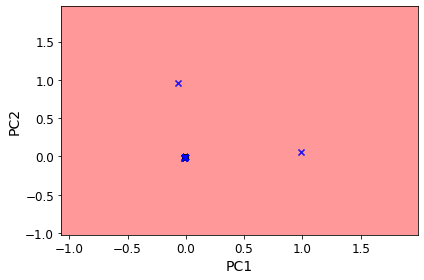

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.54      1.00      0.70        33

    accuracy                           0.54        61
   macro avg       0.27      0.50      0.35        61
weighted avg       0.29      0.54      0.38        61



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=2)
# X_skernpca = scikit_kpca.fit_transform(X)
X_train_skernpca = scikit_kpca.fit_transform(X_train_std)
X_test_skernpca = scikit_kpca.fit_transform(X_test_std)

svm = SVC(kernel='rbf', max_iter=10000, C=10, gamma=0.01)
svm.fit(X_train_skernpca, y_train)
# print( X_skernpca.shape)
plot_decision_regions(X_train_skernpca, y_train, classifier=svm)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

y_pred=svm.predict(X_test_skernpca)

print(classification_report(y_test,y_pred))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

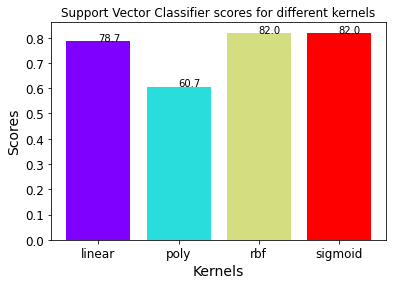

In [ ]:
# svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# for i in range(len(kernels)):
#     svc_classifier = SVC(kernel = kernels[i], C=0.9, max_iter=10000)
#     svc_classifier.fit(X_train_robust_std, y_train)
#     svc_scores.append(svc_classifier.score(X_test_robust_std, y_test))

colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], round(svc_scores[i]*100,1))
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [ ]:
scores = cross_val_score(svcClassifier[0], X_train_robust_std, y_train, cv=4, scoring='accuracy')
# print(scores)
average_score = scores.mean()
print(scores)
print(average_score)

print('====')

acc_log=[]
kf=StratifiedKFold(n_splits=4)
for fold , (train_index,test_index) in enumerate(kf.split(X,y)):

    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    #Min max Scalar
    mm_scaler=MinMaxScaler()
    X_train_fold=mm_scaler.fit_transform(X_train_fold)
    X_test_fold = mm_scaler.transform(X_test_fold)

    clf=SVC(kernel='rbf', max_iter=10000, C=0.3, probability=True)
    clf.fit(X_train_fold,y_train_fold)
    y_pred=clf.predict(X_test_fold)

    print(f"| The fold is : {fold} | ")
    print('+'+'-'*55+ '+')
    print('| Accuracy: ' +'\033[1m {:.2f}%'.format(accuracy_score(y_test_fold, y_pred)*100))
    print('| Precision: ' +'\033[1m {:.2f}%'.format(precision_score(y_test_fold, y_pred)*100))
    print('| Recall: ' +'\033[1m {:.2f}%'.format(recall_score(y_test_fold, y_pred)*100))
    print('| Misclassifications: %d' % (y_test_fold != y_pred).sum())
    print('+'+'-'*55+ '+')

    # print(classification_report(y_test_fold,y_pred))
    acc=roc_auc_score(y_test_fold,y_pred)
    acc_log.append(acc)

    pass
    print('+'+'-'*55+ '+')

[0.81967213 0.80327869 0.88333333 0.9       ]
0.851571038251366
====
| The fold is : 0 | 
+-------------------------------------------------------+
| Accuracy:  81.58%
| Precision:  79.17%
| Recall:  90.48%
| Misclassifications: 14
+-------------------------------------------------------+
+-------------------------------------------------------+
| The fold is : 1 | 
+-------------------------------------------------------+
| Accuracy:  84.21%
| Precision:  85.37%
| Recall:  85.37%
| Misclassifications: 12
+-------------------------------------------------------+
+-------------------------------------------------------+
| The fold is : 2 | 
+-------------------------------------------------------+
| Accuracy:  81.58%
| Precision:  86.49%
| Recall:  78.05%
| Misclassifications: 14
+-------------------------------------------------------+
+-------------------------------------------------------+
| The fold is : 3 | 
+-------------------------------------------------------+
| Accuracy:  78

### Evaluating the model with unseen data

In [ ]:
# Testing the model with data not seen before
svcClassifier[2].predict(X_test_fold[:10, :])


array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

## Decision Tree

![Decision Tree](https://media.istockphoto.com/id/1205333441/vector/decision-tree-example-diagram-vector-illustration.jpg?s=612x612&w=0&k=20&c=jz9B4BbGpPbbkxqd9V-T4Dwo1QEMGOyj73gLpWEWJMc=)

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='gini')
tree_clf = tree_clf.fit(X_train_robust_std, y_train)
print('The maximum depth of the tree is ', tree_clf.get_depth())

accuracies = []
print('Depth', ' Train Accuracy', ' Test Accuracy', ' CV Accuracy')

for d in range(1,10):
    tree_clf = DecisionTreeClassifier(criterion='gini', max_depth = d)
    tree_clf = tree_clf.fit(X_train, y_train)

    train_accuracy = tree_clf.score(X_train, y_train)
    test_accuracy = tree_clf.score(X_test, y_test)

    cv_accuracy = np.mean(cross_val_score(tree_clf, X_train, y_train, cv=4))
    accuracies.append([d, train_accuracy, test_accuracy, cv_accuracy])

    print(' ', d, ' '*6, '%.4f' % train_accuracy, ' '*8, '%.4f'% test_accuracy, ' '*5, '%.4f'% cv_accuracy)

models['decision_tree'] = accuracies[2][2]*100

The maximum depth of the tree is  11
Depth  Train Accuracy  Test Accuracy  CV Accuracy
  1        0.7769          0.6885       0.7520
  2        0.7975          0.6721       0.7398
  3        0.8595          0.8197       0.7934
  4        0.8843          0.7705       0.7851
  5        0.9421          0.7377       0.7728
  6        0.9545          0.7213       0.7934
  7        0.9711          0.7541       0.7684
  8        0.9793          0.7049       0.7604
  9        0.9917          0.7049       0.7561


Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

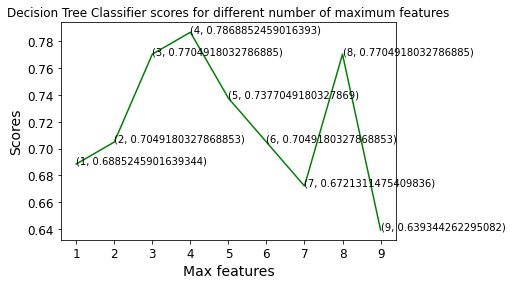

In [ ]:
dt_scores = []
error_rate = []
for i in range(1, 10):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 1)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))
    error_rate.append(np.mean(pred_i != y_test))

# print(error_rate)

# plt.figure(figsize =(10, 6))
# plt.plot(range(1, 10), error_rate, color ='blue',
#                 linestyle ='dashed', marker ='o',
#          markerfacecolor ='red')

# plt.title('Error Rate vs. Depth Value')
# plt.xlabel('Depth')
# plt.ylabel('Error Rate')

plt.plot([i for i in range(1, 10)], dt_scores, color = 'green')
for i in range(1, 10):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, 10)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

# https://towardsdatascience.com/predicting-presence-of-heart-diseases-using-machine-learning-36f00f3edb2c

## Random Forest

![Random Forest](https://miro.medium.com/max/640/1*hmtbIgxoflflJqMJ_UHwXw.webp)

In [ ]:
rf_base_classifier=RandomForestClassifier(n_estimators=10, random_state = 1)
rf_base_classifier.fit(X_train,y_train)
prediction=rf_base_classifier.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
models['random_forest'] = accuracy*100


0.8032786885245902
[[23  5]
 [ 7 26]]


In [ ]:
rf_base_classifier=RandomForestClassifier(n_estimators=10, random_state = 1)
rf_base_classifier.fit(X_train_robust_std,y_train)
prediction=rf_base_classifier.predict(X_test_robust_std)
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))

0.8032786885245902
[[23  5]
 [ 7 26]]


In [ ]:
rf_base_classifier = RandomForestClassifier(random_state = 1)
rf_base_classifier.fit(X_train, y_train)
print('Train Score: {}'.format(rf_base_classifier.score(X_train, y_train)))
y_pred = rf_base_classifier.predict(X_test)
print('Test Score: {}'.format(accuracy_score(y_test, y_pred)))
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
print(confusion_matrix(y_test,prediction))


Train Score: 1.0
Test Score: 0.8032786885245902
0.8032786885245902
[[23  5]
 [ 7 26]]


Observation


*   When run at different times, different scores were gotten
*   Random forest works better with non standadized data than scalled data.



## Hyperparameter tuning for Random Forest using GridSearch CV

In [ ]:
# Hyper parameter tuning

# Number of trees in random forest
n_estimators = [2, 3, 5, 8, 10, 12, 15, 17, 20]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [ 3, 4, 5, 6, 7, 8, 9, 10]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'criterion':['entropy','gini']}


grid_search_rf = GridSearchCV(
    estimator=rf_base_classifier,
    param_grid=param_grid,
)

print('='*50+'UNSCALED DATA'+'='*50)
grid_search_rf.fit(X_train, y_train)
print('Best Parameters for Unscaled features: {}'.format(grid_search_rf.best_params_))
print('Best CrossVal Score for Unscaled data::{}'.format(grid_search_rf.best_score_))
print('='*50+'SCALED DATA'+'='*50)
grid_search_rf.fit(X_train_robust_std, y_train)
print('Best Parameters for Scaled features: {}'.format(grid_search_rf.best_params_))
print('Best CrossVal Score for Scaled features:{}'.format(grid_search_rf.best_score_))

==================================================UNSCALED DATA==================================================
Best Parameters for Unscaled features: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 17}
Best CrossVal Score for Unscaled data::0.8100340136054422
==================================================SCALED DATA==================================================
Best Parameters for Scaled features: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 17}
Best CrossVal Score for Scaled features:0.8142006802721088


In [ ]:
rf_base_classifier = RandomForestClassifier(n_estimators=8, criterion='gini', max_depth=3, max_features='log2', random_state=1)
rf_base_classifier.fit(X_train, y_train)
print('Train Score: {}'.format(rf_base_classifier.score(X_train, y_train)))
y_pred = rf_base_classifier.predict(X_test)
print('Test Score: {}'.format(accuracy_score(y_test, y_pred)))
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
print(confusion_matrix(y_test,y_pred))
models['random_forest_grid'] = accuracy*100

Train Score: 0.8512396694214877
Test Score: 0.8032786885245902
0.8032786885245902
[[21  7]
 [ 5 28]]


In [ ]:
!pip install TPOT
!cls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 14.4 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=008a2066caaa48639af1eefcf2f0f15de70e1944fefae496a3d1936fd0364646
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
/bin/bash: cls: command not found


In [ ]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 3, stop = 100, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 30, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

# Hyper parameter tuning using Genetic Algorithm from source [x]
from tpot import TPOTClassifier

tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param},
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train_robust_std,y_train)

# end of source[x]
# source[x] -

{'n_estimators': [3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 54, 59, 64, 69, 74, 79, 84, 89, 94, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8553278688524589

Generation 2 - Current best internal CV score: 0.8556693989071038

Generation 3 - Current best internal CV score: 0.8556693989071038

Generation 4 - Current best internal CV score: 0.8596994535519126

Generation 5 - Current best internal CV score: 0.8596994535519126

Best pipeline: RandomForestClassifier(RandomForestClassifier(input_matrix, criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=28), criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=89)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [3,
                                                                                      6,
                                                                                      9,
                                                                                      12,
                                                                                      15,
                                                                                      18,
                                                                                      21,
                                                                                      24,
                                                                                      27,
 

In [ ]:
rf_base_classifier = RandomForestClassifier(n_estimators=890, criterion='gini', max_features='auto', max_depth=9, min_samples_leaf=8, min_samples_split=4, random_state = 1)
rf_base_classifier.fit(X_train, y_train)
print('Train Score: {}'.format(rf_base_classifier.score(X_train, y_train)))
y_pred = rf_base_classifier.predict(X_test)
print('Test Score: {}'.format(accuracy_score(y_test, y_pred)))
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
print(confusion_matrix(y_test,y_pred))
models['random_forest_gene'] = accuracy*100

Train Score: 0.8842975206611571
Test Score: 0.819672131147541
0.819672131147541
[[21  7]
 [ 4 29]]


In [ ]:
accuracy = tpot_classifier.score(X_test_robust_std, y_test)
print(accuracy)
models["random_forest"] = accuracy*100

0.8032786885245902


# Evaluating the models

In [ ]:
for model in models:
    print(str(model)," : ",str(models[model]))

linear_regression  :  0
perceptron  :  73.77049180327869
log_regression  :  81.9672131147541
pca_log_regression  :  77.16450216450217
optimized_log_regression  :  81.967
knn_unscaled  :  63.934426229508205
knn_scaled  :  85.24590163934425
Optimized_knn  :  85.24590163934425
svm  :  81.967
decision_tree  :  81.9672131147541
random_forest  :  80.32786885245902
random_forest_grid  :  80.32786885245902
random_forest_gene  :  81.9672131147541


In [ ]:
model_keys = models.keys()
model_values = models.values()

In [ ]:
fig = px.histogram(x=model_keys,
             y=model_values,
             color=model_keys,
             title='Models v/s Accuracy'
            )
fig.show()

# Summary & Conclusion


* Depending on the model of choice Standardization, Normalization & Regularlization approachs are important as they limit overfitting.

* Choice of Standardization or Normalization have relatively low effect on training scores, but can help mitigate bias and variance related issues which in turn improves generalization of the model

* Distance algorithms like "KNN", "SVM" are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity

* Hyperparameter tuning as an optimization technique and is an essential aspect of the machine learning process. A good choice of hyperparameters may make your model meet your desired metric.

* Greedy algorithms like GridSearchCV & Genetic Algorithm can help in model fitting but are computationally intensive and time consuming.

----


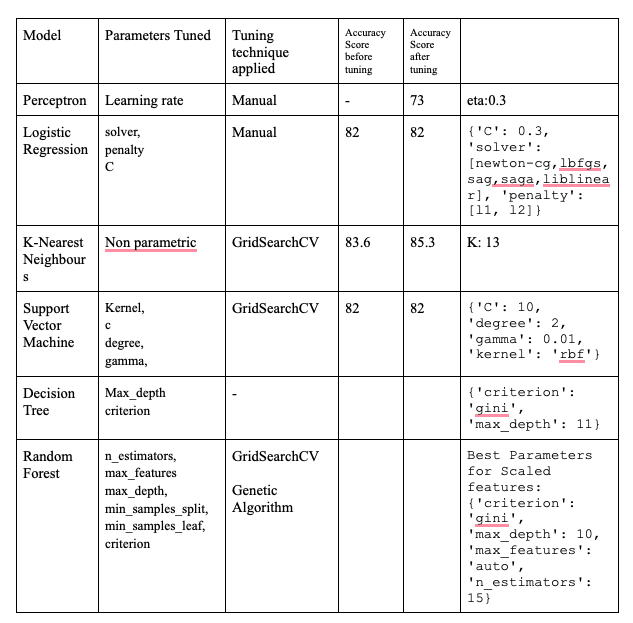

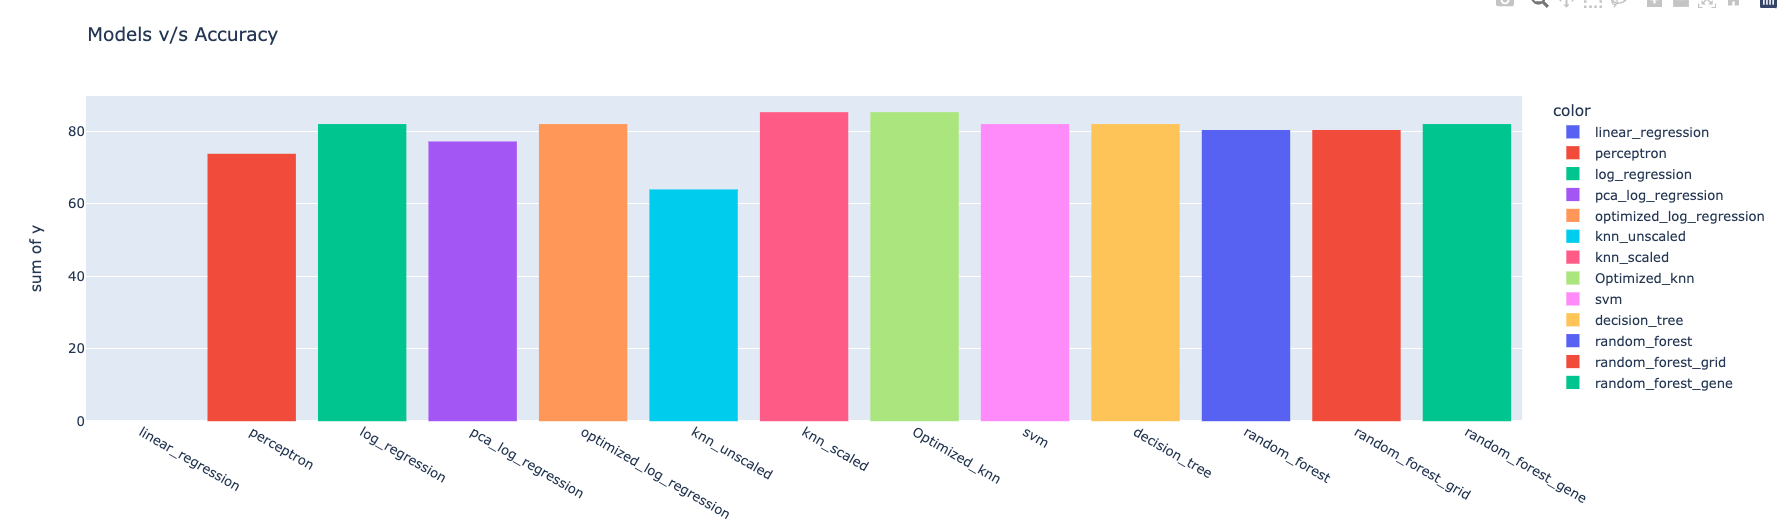

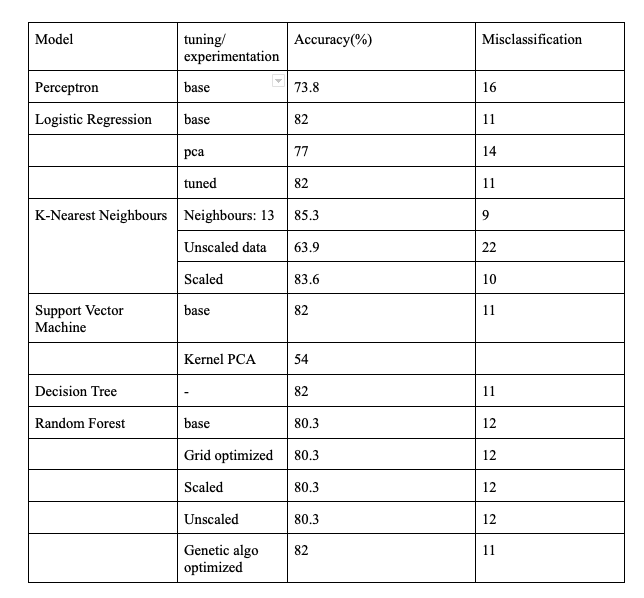

**Further possible Optimizations**
* Optimizing the Decision tree using Pruning
* Tuning the the learning rate using decay schedules like exponential, step wise etc.
* Data Augumentation
* Improve the KPCA tuned model

# References

Reference List
Ansari, S. (2021) “Hyperparameter tuning in Random Forest Classifier using genetic algorithm.” Available at: https://sakilansari4.medium.com/hyperparameter-tuning-in-random-forest-classifier-using-genetic-algorithm-709553092e63.


Bhanot, K. (2019) “Predicting presence of Heart Diseases using Machine Learning.” Available at: https://towardsdatascience.com/predicting-presence-of-heart-diseases-using-machine-learning-36f00f3edb2c.


Gaur, D. (2022) “A Guide to any Classification Problem.” Available at: https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem#Choosing-the-best-Evaluation-Matrix:


Han, N. (2022) “Heart Failure - DT, RF, SVM, PCA, K-Means.” Available at: https://www.kaggle.com/code/nichyhan/heart-failure-dt-rf-svm-pca-k-means.


Koehrsen, W. (2018) “Hyperparameter Tuning the Random Forest in Python.” Available at: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74.


Manchanda, N. (2020) “Heart Attack - EDA + Prediction.” Available at: https://www.kaggle.com/code/namanmanchanda/heart-attack-eda-prediction-90-accuracy.


McHugh, J. (2019) “Predicting Heart Failure: Hyperparameter Tuning with GridSearch in Python.” Available at: https://medium.com/@teamastertoast/predicting-heart-failure-hyperparameter-tuning-with-gridsearch-in-python-973c35ce5a1a.


Parab, S. (2023) “Heart Attack Analysis & Prediction.” Available at: https://www.kaggle.com/code/shrikrishnaparab/heart-attack-analysis-prediction-accuracy-85-24?scriptVersionId=114822843.


Scikit Documentation (no date). Available at: https://scikit-learn.org/.


Sebastian Raschka, A. V. M. (2019) Python Machine Learning : Machine Learning and Deep Learning with Python, Scikit-Learn, and TensorFlow 2, 3rd Edition. Packt Publishing, Limited. Available at: https://ebookcentral.proquest.com/lib/lboro/detail.action?docID=6005547.






